<a href="https://colab.research.google.com/github/tranletuhien/Tu-Hien/blob/main/cifar100_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Trần Lê Tú Hiền 20146334
import numpy as np
from keras.datasets import cifar100
from keras.utils.np_utils import to_categorical   
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Số này là: [[[ 50  54  57]
  [ 56  56  61]
  [ 52  51  56]
  ...
  [ 97 113 107]
  [ 65  80  68]
  [ 67  79  67]]

 [[ 55  59  62]
  [ 64  64  68]
  [ 54  52  57]
  ...
  [101 117 111]
  [ 64  80  67]
  [ 65  77  66]]

 [[ 55  56  61]
  [ 68  68  72]
  [ 56  54  63]
  ...
  [ 97 111 106]
  [ 59  69  62]
  [ 57  64  62]]

 ...

 [[ 89  86  56]
  [105 100  61]
  [114 108  69]
  ...
  [ 94  70  68]
  [ 98  74  62]
  [113  87  67]]

 [[ 82  80  60]
  [ 90  87  60]
  [122 109  74]
  ...
  [ 89  64  67]
  [ 96  66  67]
  [ 97  67  66]]

 [[ 76  74  59]
  [ 74  68  60]
  [112  99  69]
  ...
  [ 82  64  64]
  [ 90  64  67]
  [ 96  66  63]]]


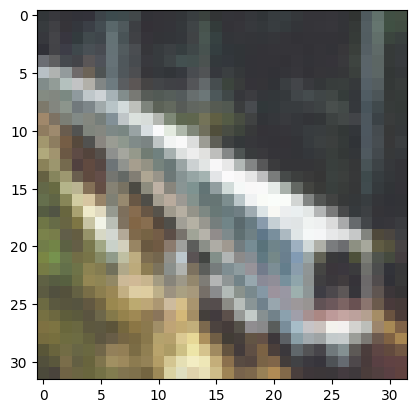

In [42]:
digit=X_train[6]
import matplotlib.pyplot as plt 
plt.imshow(digit)
plt.show
print('Số này là:',X_train[6])

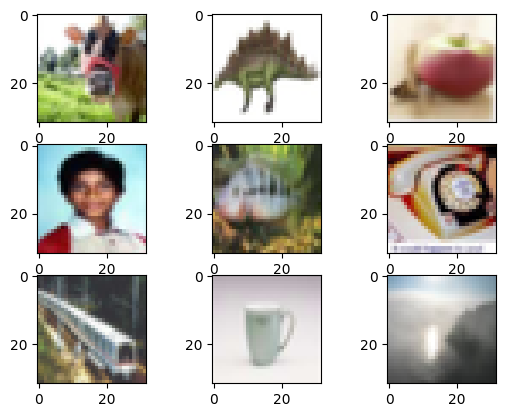

In [43]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i])
plt.show()

In [44]:
from tensorflow.python import summary
from keras.models import Sequential  #sequential: mạng mô tả ANN, các lớp kế tiếp nhau; full_connected: sự kết nối đầy đủ giữa các tế bào
from keras.layers import Dense,Activation,Dropout
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3*32*32,),name='layer1'))
model.add(Dropout(0.2)) 
model.add(Dense(256, activation = 'relu',name='layer2'))
model.add(Dropout(0.1)) 
model.add(Dense(128, activation = 'relu',name='layer3')) 
model.add(Dropout(0.1)) 
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [45]:
X_train=X_train.reshape((50000,3*32*32))
X_train=X_train.astype('float32')/255

X_test=X_test.reshape((10000,3*32*32))
X_test=X_test.astype('float32')/255

print(X_train.shape)
print(X_test.shape)

(50000, 3072)
(10000, 3072)


In [46]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)



In [47]:
print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [48]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50,batch_size=1000) # epochs: số lần học
test_loss,test_acc=model.evaluate(X_test,y_test) 
print('Độ mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/50
50/50 [==============================] - 12s 220ms/step - loss: 4.5728 - accuracy: 0.0186
Epoch 2/50
50/50 [==============================] - 14s 277ms/step - loss: 4.3315 - accuracy: 0.0414
Epoch 3/50
50/50 [==============================] - 9s 172ms/step - loss: 4.2004 - accuracy: 0.0559
Epoch 4/50
50/50 [==============================] - 10s 204ms/step - loss: 4.1112 - accuracy: 0.0674
Epoch 5/50
50/50 [==============================] - 11s 212ms/step - loss: 4.0338 - accuracy: 0.0791
Epoch 6/50
50/50 [==============================] - 8s 166ms/step - loss: 3.9672 - accuracy: 0.0894
Epoch 7/50
50/50 [==============================] - 11s 211ms/step - loss: 3.9262 - accuracy: 0.0962
Epoch 8/50
50/50 [==============================] - 11s 212ms/step - loss: 3.8798 - accuracy: 0.1029
Epoch 9/50
50/50 [==============================] - 8s 168ms/step - loss: 3.8358 - accuracy: 0.1093
Epoch 10/50
50/50 [==============================] - 10s 211ms/step - loss: 3.8037 - accuracy:

In [49]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
model.save('/content/drive/MyDrive/cifar100.h5')

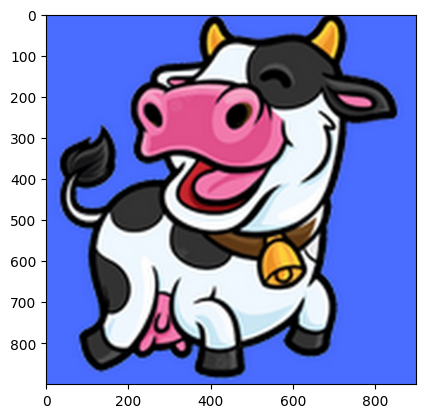

In [55]:
import numpy as np
img=plt.imread('cow.jpg')
plt.show()
plt.imshow(img)
plt.show()

In [56]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img=load_img('cow.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 0s 27ms/step


array([61])

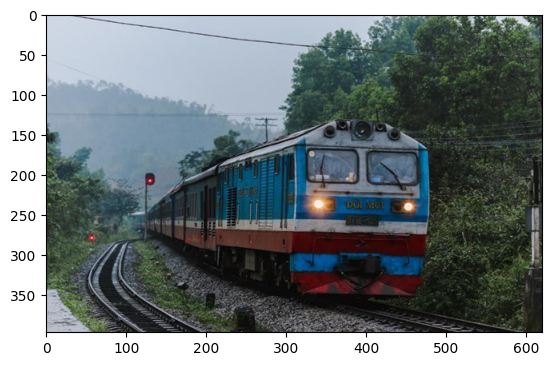

In [57]:
img=plt.imread('train.jpg')
plt.show()
plt.imshow(img)
plt.show()

In [58]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img=load_img('train.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 0s 35ms/step


array([85])